In [201]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import prince

In [202]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [203]:
# 1. CARGA DEL DATASET

poisonous = fetch_ucirepo(id=73)  # Dataset: poisonous
df = poisonous.data.original

In [204]:
print("\n ESTRUCTURA DEL DATASET")
print(f"• Nombre: {poisonous.metadata['name']}")
print(f"• Área: {poisonous.metadata['area']}")
print(f"• Características: {poisonous.metadata['num_features']}")
print(f"• Instancias: {poisonous.metadata['num_instances']:,}")

# Accede de forma segura a la variable objetivo
target = poisonous.metadata.get('target', 'Poisonous')
print(f"• Variable objetivo: {target}")


 ESTRUCTURA DEL DATASET
• Nombre: Mushroom
• Área: Biology
• Características: 22
• Instancias: 8,124
• Variable objetivo: Poisonous


In [205]:
# Mostrar las categorías únicas de cada columna para saber cual es el posterior analisis
for col in X.columns:
    print(f"{col}: {X[col].unique()}")


cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [206]:
# 2. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# Asegurar que pandas muestre todo
pd.set_option('display.max_rows', None)   # Muestra todas las filas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

for col in X.columns:
    print(f"\n--- Frecuencias en la columna: {col} ---")
    print(X[col].value_counts(dropna=False))  # Incluye también los NaN si existen




--- Frecuencias en la columna: cap-shape ---
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

--- Frecuencias en la columna: cap-surface ---
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

--- Frecuencias en la columna: cap-color ---
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

--- Frecuencias en la columna: bruises ---
bruises
f    4748
t    3376
Name: count, dtype: int64

--- Frecuencias en la columna: odor ---
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

--- Frecuencias en la columna: gill-attachment ---
gill-attachment
f    7914
a     210
Name: count, dtype: int64

--- Frecuencias en la columna: gill-spacing ---
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

--- Frecuencias en la columna: gill-size ---
gill-size
b    5612
n 

In [207]:
# Verificar y limpiar datos faltantes
print("Valores faltantes por columna antes de la limpieza:")
print(X.isnull().sum())

Valores faltantes por columna antes de la limpieza:
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


# MCA codificacion basica

In [208]:
# Crear una copia de X para no modificar el original
E = X.copy()
F = y.copy()

In [209]:
# Reemplazar categorías raras por 'Otros'
for col in E.select_dtypes('category').columns:
    freqs = E[col].value_counts(normalize=True)
    rare = freqs[freqs < 0.15].index  # categorías con <15% de frecuencia
    E[col] = E[col].replace(rare, 'Otra_categoría')

In [210]:
# 2. Análisis MCA

# Crear y ajustar modelo MCA
mca = prince.MCA(
    n_components=10,
    n_iter=20,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
# Transformar los datos
mca = mca.fit(E)

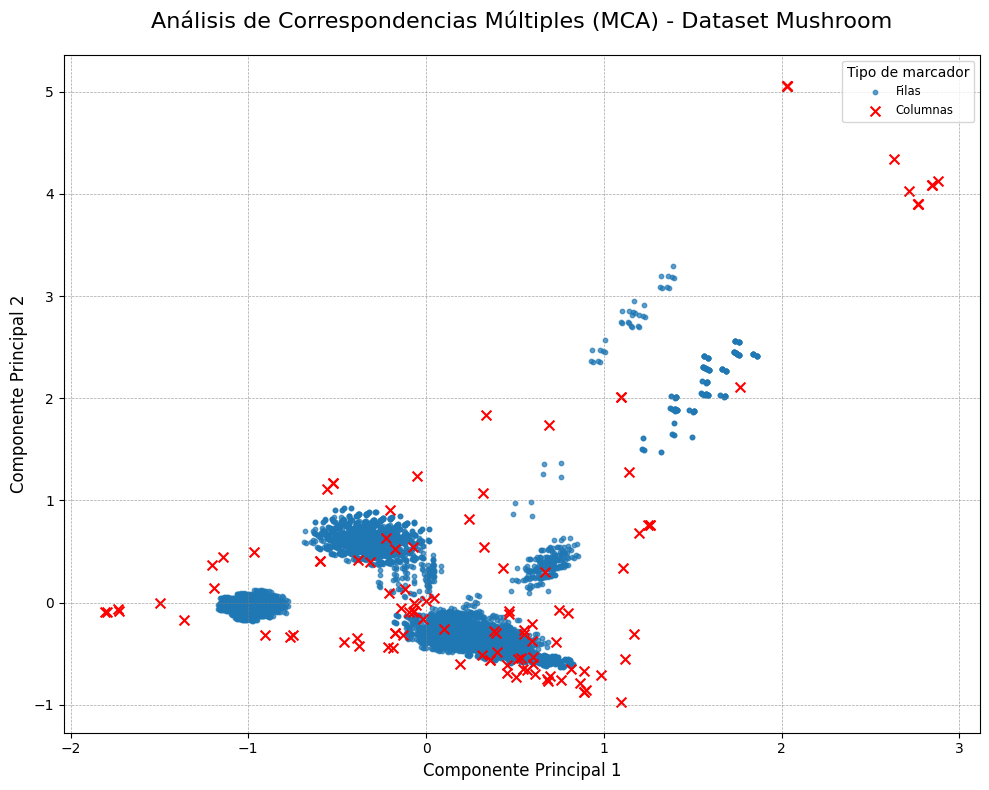

In [211]:
row_coords = mca.row_coordinates(E)
col_coords = mca.column_coordinates(E)

plt.figure(figsize=(10, 8))

# Filas
plt.scatter(
    row_coords.iloc[:, 0], row_coords.iloc[:, 1],
    alpha=0.7,
    s=10,
    label='Filas'
)

# Columnas (marcadores diferentes)
plt.scatter(
    col_coords.iloc[:, 0], col_coords.iloc[:, 1],
    color='red',
    marker='x',
    s=50,
    label='Columnas'
)

plt.title("Análisis de Correspondencias Múltiples (MCA) - Dataset Mushroom", fontsize=16, pad=20)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)
plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize='small', title='Tipo de marcador', title_fontsize='medium')
plt.tight_layout()
plt.show()



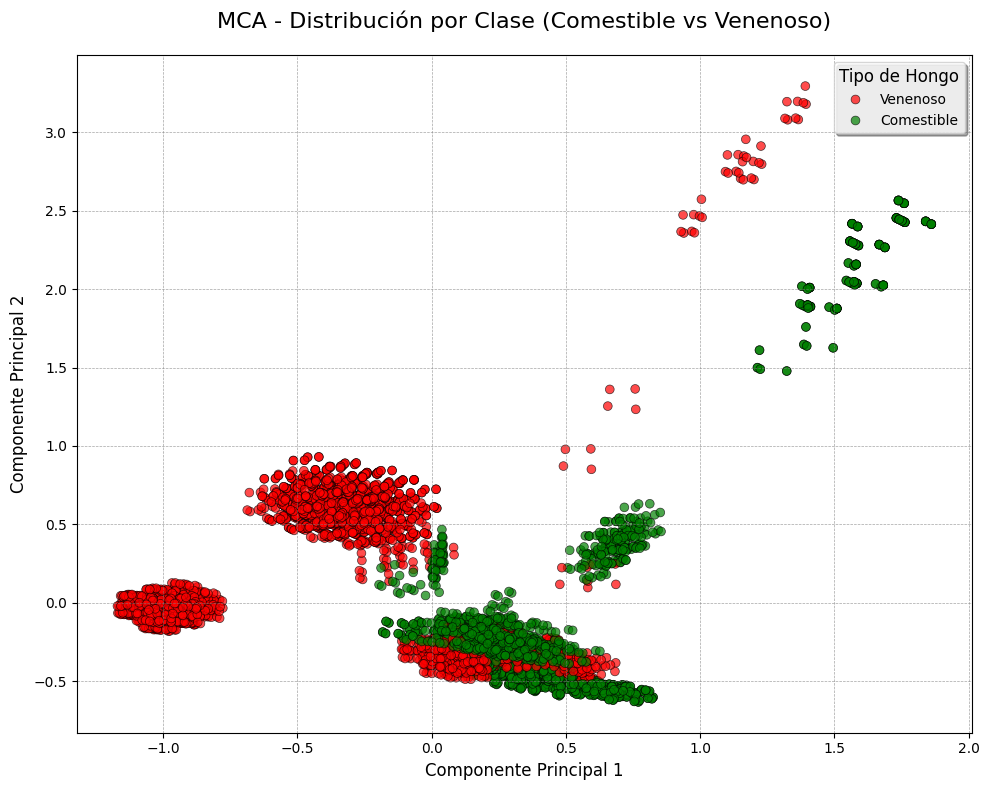

In [212]:
# Crear una nueva serie con nombres en español
F_mapped = F.iloc[:, 0].map({'e': 'Comestible', 'p': 'Venenoso'})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=row_coords.iloc[:, 0],
    y=row_coords.iloc[:, 1],
    hue=F_mapped,
    alpha=0.7,
    s=40,
    palette={'Comestible': 'green', 'Venenoso': 'red'},
    edgecolor='black'  
)

plt.title("MCA - Distribución por Clase (Comestible vs Venenoso)", fontsize=16, pad=20)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)

plt.legend(
    title="Tipo de Hongo",
    title_fontsize=12,
    fontsize=10,
    loc='upper right',
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.8
)

plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



In [213]:
# Inercia explicada
explained_inertia = mca.eigenvalues_summary
print(f"Inercia explicada por los componentes: {explained_inertia}")
print(f"Coordenadas de las filas: {mca.row_coordinates(X).head()}")
print(f"Coordenadas de las columnas: {mca.column_coordinates(X).head()}")


Inercia explicada por los componentes:           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.328         7.53%                      7.53%
1              0.305         7.00%                     14.53%
2              0.280         6.43%                     20.96%
3              0.248         5.68%                     26.64%
4              0.209         4.80%                     31.44%
5              0.199         4.57%                     36.01%
6              0.176         4.05%                     40.06%
7              0.145         3.32%                     43.38%
8              0.104         2.40%                     45.78%
9              0.099         2.26%                     48.04%
Coordenadas de las filas:           0         1         2         3         4         5         6  \
0  0.561561 -0.378278 -0.216267  0.011235  0.341656 -0.249283  0.147254   
1  0.538260 -0.523929  0.270451  0.149212

In [214]:
# Contribuciones de las filas
print("Contribuciones de las filas (primeras 5 filas):")
display(mca.row_contributions_.head(10).style.format('{:.0%}'))

# Contribuciones de las columnas
print("Contribuciones de las columnas (primeras 5 columnas):")
display(mca.column_contributions_.head(10).style.format('{:.0%}'))

# Similitudes coseno de las columnas
print("Similitudes coseno de las columnas (primeras 5 columnas):")
display(mca.column_cosine_similarities(df).head(10))


Contribuciones de las filas (primeras 5 filas):


Contribuciones de las columnas (primeras 5 columnas):


Similitudes coseno de las columnas (primeras 5 columnas):


0         1             2             3         4  \
bruises__f    0.200931  0.234400  9.325886e-03  4.505905e-03  0.300694   
bruises__t    0.208488  0.214602  5.902784e-03  4.586933e-03  0.305349   
cap-color__b  0.006360  0.001496  3.363539e-04  1.017290e-03  0.004605   
cap-color__c  0.002629  0.016659  1.445525e-02  8.269454e-02  0.000360   
cap-color__e  0.006632  0.062153  1.476422e-01  1.358319e-02  0.091369   
cap-color__g  0.042102  0.052610  5.212839e-02  9.949855e-03  0.000630   
cap-color__n  0.041448  0.115523  4.625986e-02  1.087730e-02  0.007201   
cap-color__p  0.011464  0.000176  3.528265e-05  2.254165e-03  0.000237   
cap-color__r  0.000059  0.000165  2.182642e-07  1.427782e-07  0.000081   
cap-color__u  0.000059  0.000165  2.182642e-07  1.427782e-07  0.000081   

                     5         6         7         8         9  
bruises__f    0.048018  0.013664  0.001359  0.019839  0.000038  
bruises__t    0.054771  0.015304  0.001685  0.019988  0.000024  
cap-color__b  0.084766  0.016905  0.003227  0.002420  0.028575  
cap-color__c  0.006455  0.005519  0.000138  0.002542  0.001844  
cap-color__e  0.000283  0.000081  0.000658  0.008379  0.005284  
cap-color__g  0.005395  0.079661  0.000688  0.029745  0.001014  
cap-color__n  0.016639  0.002312  0.002603  0.054533  0.010331  
cap-color__p  0.111386  0.006981  0.002688  0.011234  0.039815  
cap-color__r  0.000268  0.001028  0.000223  0.021437  0.187597  
cap-color__u  0.000268  0.001028  0.000223  0.021437  0.187596

# Transformacion de datos


In [215]:
import pandas as pd
import category_encoders as ce

# Mostrar todas las columnas/filas de salida
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# === Paso 1: Agrupar categorías raras (<10%) como 'Otros' ===
for col in E.columns:
    print(f"\n--- Columna: {col} ---")
    
    # Frecuencias relativas
    freqs = E[col].value_counts(normalize=True, dropna=False)
    
    # Identificar categorías con menos del 10%
    rare = freqs[freqs < 0.10].index
    
    # Reemplazar categorías raras por 'Otros'
    E[col] = E[col].replace(rare, 'Otros')
    
    # Mostrar frecuencias actualizadas (%)
    freqs_final = E[col].value_counts(normalize=True, dropna=False) * 100
    print(freqs_final.round(2))


--- Columna: cap-shape ---
cap-shape
x        45.00
f        38.80
k        10.19
Otros     6.01
Name: proportion, dtype: float64

--- Columna: cap-surface ---
cap-surface
y        39.93
s        31.46
f        28.56
Otros     0.05
Name: proportion, dtype: float64

--- Columna: cap-color ---
cap-color
n        28.11
g        22.65
e        18.46
y        13.20
w        12.80
Otros     4.78
Name: proportion, dtype: float64

--- Columna: bruises ---
bruises
f    58.44
t    41.56
Name: proportion, dtype: float64

--- Columna: odor ---
odor
n        43.43
Otros    29.99
f        26.59
Name: proportion, dtype: float64

--- Columna: gill-attachment ---
gill-attachment
f        97.42
Otros     2.58
Name: proportion, dtype: float64

--- Columna: gill-spacing ---
gill-spacing
c    83.85
w    16.15
Name: proportion, dtype: float64

--- Columna: gill-size ---
gill-size
b    69.08
n    30.92
Name: proportion, dtype: float64

--- Columna: gill-color ---
gill-color
Otros    32.67
b        21.27
p  

In [216]:
# === Paso 2: Aplicar Weight of Evidence (WOEEncoder) ===

encoder = ce.WOEEncoder(
    cols=E.columns.tolist(),
    verbose=1,
    drop_invariant=False,
    return_df=True,
    handle_unknown='value',
    handle_missing='value',
    random_state=42,
    randomized=False,
    sigma=0.01,
    regularization=1.0
)

# Ajustar y transformar
df_woe = encoder.fit_transform(E, F_mapped)
print("\n Codificación WOE completa. DataFrame resultante:")
print(df_woe.head())



 Codificación WOE completa. DataFrame resultante:
   cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0  -0.059527     0.282192  -0.142408 -1.410814  0.786641         0.042066   
1  -0.059527     0.282192   0.589665 -1.410814  0.786641         0.042066   
2  -2.037760     0.282192  -0.737317 -1.410814  0.786641         0.042066   
3  -0.059527     0.217548  -0.737317 -1.410814  0.786641         0.042066   
4  -0.059527     0.282192  -0.172542  0.887301 -3.266502         0.042066   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
0      0.306590   2.112967   -0.135181     0.233689   -1.141772   
1      0.306590  -0.767963   -0.135181     0.233689   -2.679654   
2      0.306590  -0.767963   -2.043414     0.233689   -2.679654   
3      0.306590   2.112967   -2.043414     0.233689   -1.141772   
4     -2.291641  -0.767963   -0.135181    -0.179323   -1.141772   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0 


3 componentes retienen al menos el 85% de la varianza total.
Varianza acumulada: 0.866


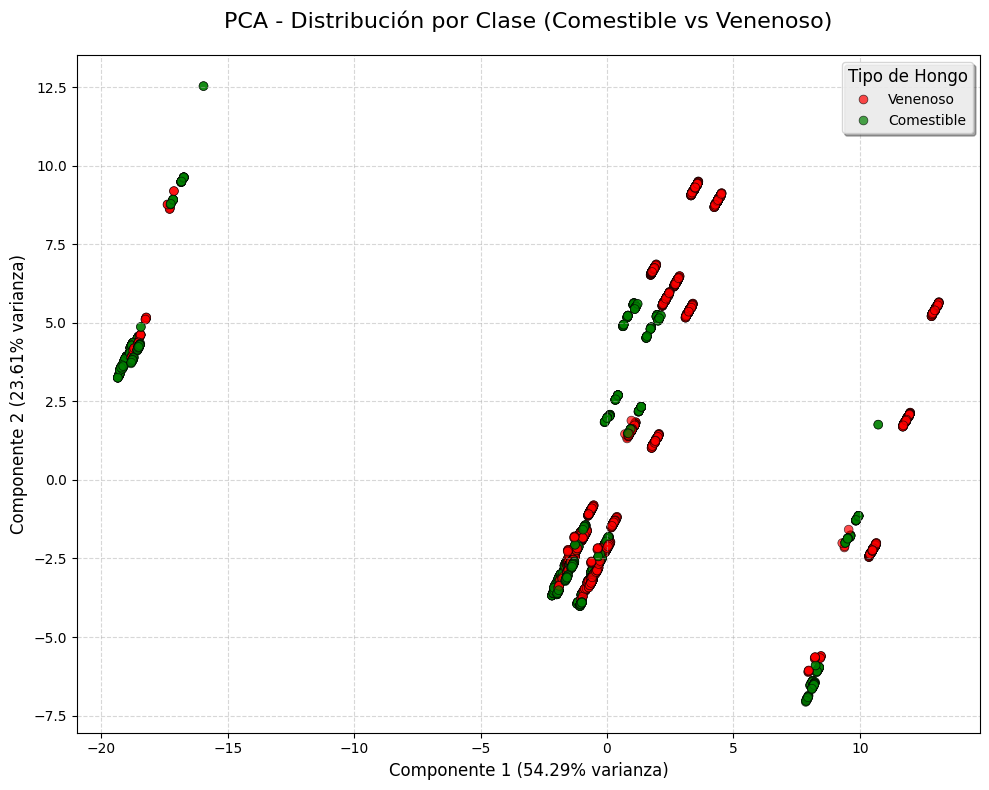

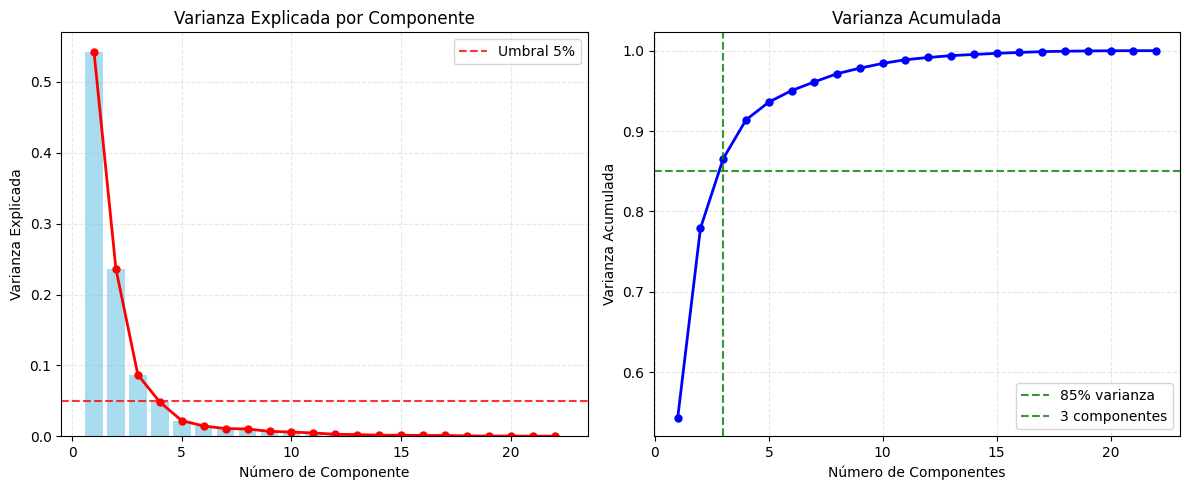


RESUMEN DEL ANÁLISIS PCA
 Número de características originales: 22
 Componentes seleccionados: 3
 Varianza total explicada: 0.866
 Varianza por componente principal:
   • Componente 1: 0.543 (54.29%)
   • Componente 2: 0.236 (23.61%)
   • Componente 3: 0.087 (8.67%)


In [ ]:
# ==============================================
#  ANÁLISIS FACTORIAL (PCA) + VISUALIZACIÓN AVANZADA
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# -------------------------------------------------
# 1️ Preparación de los datos
# -------------------------------------------------
# Eliminar filas con valores faltantes
df_clean_1 = df_woe.dropna()
df_clean = df_clean_1.copy()

# -------------------------------------------------
# 2️ Escalado y Aplicación del PCA
# -------------------------------------------------
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_clean)

pca = PCA()
pca.fit(X_scaled)

# Selección automática del número óptimo de componentes (85% varianza explicada)
explained_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_var >= 0.85) + 1

print(f"\n{n_components} componentes retienen al menos el 85% de la varianza total.")
print(f"Varianza acumulada: {explained_var[n_components-1]:.3f}")

# Aplicar PCA definitivo
pca_final = PCA(n_components=n_components, random_state=42)
X_pca = pca_final.fit_transform(X_scaled)

# DataFrame de resultados
pca_df = pd.DataFrame(
    X_pca,
    columns=[f"Componente {i+1}" for i in range(n_components)]
)

# Agregar la clase (etiquetas)
pca_df["Clase"] = F_mapped.values

# -------------------------------------------------
# 3️ Gráfico de Dispersión (Seaborn)
# -------------------------------------------------
plt.figure(figsize=(10, 8))

palette = {"Comestible": "green", "Venenoso": "red"}

sns.scatterplot(
    data=pca_df,
    x="Componente 1",
    y="Componente 2",
    hue="Clase",
    palette=palette,
    alpha=0.7,
    s=40,
    edgecolor="black"
)

plt.title("PCA - Distribución por Clase (Comestible vs Venenoso)", fontsize=16, pad=20)
plt.xlabel(f"Componente 1 ({pca_final.explained_variance_ratio_[0]*100:.2f}% varianza)", fontsize=12)
plt.ylabel(f"Componente 2 ({pca_final.explained_variance_ratio_[1]*100:.2f}% varianza)", fontsize=12)

plt.legend(
    title="Tipo de Hongo",
    title_fontsize=12,
    fontsize=10,
    loc="upper right",
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.8
)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 4️ Scree Plot (Varianza explicada)
# -------------------------------------------------
plt.figure(figsize=(12, 5))

components_range = range(1, len(pca.explained_variance_ratio_) + 1)

# Varianza explicada individual
plt.subplot(1, 2, 1)
plt.bar(components_range, pca.explained_variance_ratio_, alpha=0.7, color='skyblue')
plt.plot(components_range, pca.explained_variance_ratio_, 'ro-', linewidth=2, markersize=5)
plt.axhline(y=0.05, color='r', linestyle='--', alpha=0.8, label='Umbral 5%')
plt.title("Varianza Explicada por Componente", fontsize=12)
plt.xlabel("Número de Componente")
plt.ylabel("Varianza Explicada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)

# Varianza acumulada
plt.subplot(1, 2, 2)
plt.plot(components_range, explained_var, 'bo-', linewidth=2, markersize=5)
plt.axhline(y=0.85, color='g', linestyle='--', alpha=0.8, label='85% varianza')
plt.axvline(x=n_components, color='g', linestyle='--', alpha=0.8, label=f'{n_components} componentes')
plt.title("Varianza Acumulada", fontsize=12)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 5️ Resumen del Análisis PCA
# -------------------------------------------------
print("\nRESUMEN DEL ANÁLISIS PCA")
print(f" Número de características originales: {df_clean.shape[1]}")
print(f" Componentes seleccionados: {n_components}")
print(f" Varianza total explicada: {explained_var[n_components-1]:.3f}")
print(" Varianza por componente principal:")

for i, var in enumerate(pca_final.explained_variance_ratio_[:5]):  # Mostrar los primeros 5
    print(f"   • Componente {i+1}: {var:.3f} ({var*100:.2f}%)")



In [250]:
# -------------------------------------------------
#   Cargas factoriales (contribución de variables a cada componente)
# -------------------------------------------------

# Cargas factoriales = pesos de cada variable en cada componente
loadings = pd.DataFrame(
    pca_final.components_.T,
    columns=[f"Componente {i+1}" for i in range(pca_final.n_components_)],
    index=df_clean.columns
)

# Mostrar las 10 variables más influyentes por componente
for i in range(min(4, pca_final.n_components_)):  # hasta 4 componentes o los que existan
    print(f"\n Variables que más aportan al Componente {i+1}:")
    contrib = loadings.iloc[:, i].abs().sort_values(ascending=False).head(10)
    for var, val in contrib.items():
        print(f"   • {var}: {val:.3f}")

# Si deseas un DataFrame completo de cargas
loadings_4 = loadings.iloc[:, :min(4, pca_final.n_components_)]
display(loadings_4.style.background_gradient(cmap="coolwarm", axis=0))




 Variables que más aportan al Componente 1:
   • cap-shape: 0.920
   • habitat: 0.258
   • gill-color: 0.254
   • stalk-root: 0.093
   • stalk-color-below-ring: 0.045
   • ring-type: 0.044
   • stalk-color-above-ring: 0.043
   • population: 0.043
   • spore-print-color: 0.034
   • gill-size: 0.030

 Variables que más aportan al Componente 2:
   • habitat: 0.798
   • gill-color: 0.427
   • cap-shape: 0.371
   • ring-type: 0.082
   • stalk-root: 0.078
   • gill-spacing: 0.070
   • stalk-color-below-ring: 0.061
   • stalk-color-above-ring: 0.059
   • population: 0.059
   • spore-print-color: 0.058

 Variables que más aportan al Componente 3:
   • gill-color: 0.817
   • habitat: 0.495
   • ring-type: 0.174
   • stalk-root: 0.134
   • cap-shape: 0.103
   • gill-size: 0.103
   • stalk-shape: 0.091
   • population: 0.061
   • cap-surface: 0.041
   • veil-color: 0.037


## PCA 

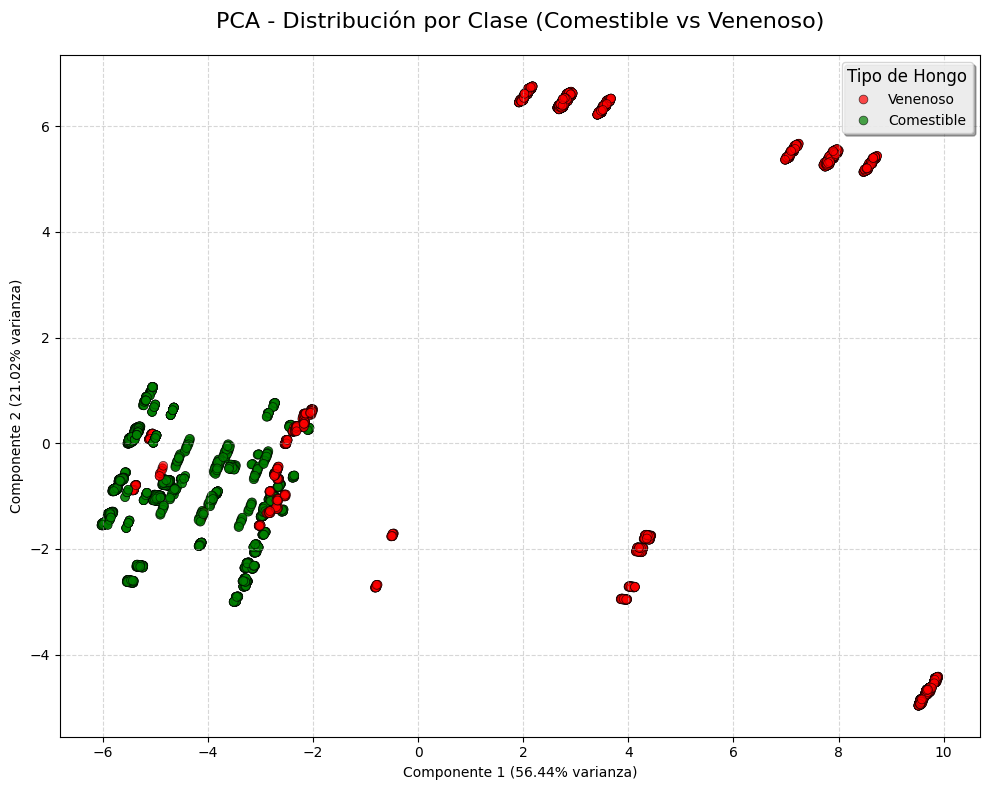


Varianza explicada por cada componente:
Componente 1: 56.44%
Componente 2: 21.02%

Varianza total explicada: 77.46%


In [218]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# ======================================
# Aplicar PCA
# ======================================
pca = PCA(n_components=2)   # Puedes cambiar a más componentes si quieres
pca_result = pca.fit_transform(df_clean)

# Convertir a DataFrame para análisis y gráficos
pca_df = pd.DataFrame(
    data=pca_result,
    columns=['Componente 1', 'Componente 2']
)

# Agregar la variable objetivo (F_mapped) al DataFrame
pca_df['Clase'] = F_mapped.loc[df_clean.index].values

# ======================================
# Visualizar PCA
# ======================================
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='Componente 1',
    y='Componente 2',
    hue='Clase',
    palette={'Comestible': 'green', 'Venenoso': 'red'},
    alpha=0.7,
    s=40,
    edgecolor='black'
)

plt.title("PCA - Distribución por Clase (Comestible vs Venenoso)", fontsize=16, pad=20)
plt.xlabel(f"Componente 1 ({pca.explained_variance_ratio_[0]*100:.2f}% varianza)")
plt.ylabel(f"Componente 2 ({pca.explained_variance_ratio_[1]*100:.2f}% varianza)")
plt.legend(
    title="Tipo de Hongo",
    title_fontsize=12,
    fontsize=10,
    loc='upper right',
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.8
)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ======================================
#  Mostrar varianza explicada total
# ======================================
print("\nVarianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var*100:.2f}%")

print(f"\nVarianza total explicada: {sum(pca.explained_variance_ratio_)*100:.2f}%")


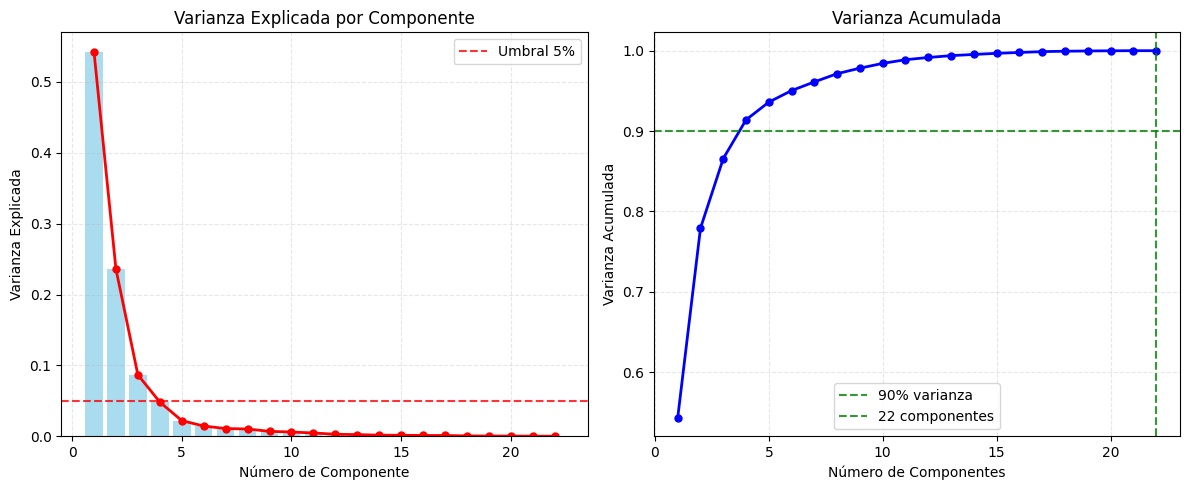


RESUMEN DEL ANÁLISIS PCA
 Número de características originales: 22
 Componentes seleccionados: 22
 Varianza total explicada: 1.000
 Varianza por componente principal:
   • Componente 1: 0.543 (54.29%)
   • Componente 2: 0.236 (23.61%)
   • Componente 3: 0.087 (8.67%)
   • Componente 4: 0.048 (4.82%)
   • Componente 5: 0.022 (2.20%)


In [253]:
# ======================================
# Scree Plot (Varianza explicada)
# ======================================
explained_var = pca.explained_variance_ratio_
n_components = len(explained_var)  # Número de componentes usados

plt.figure(figsize=(12, 5))

components_range = range(1, n_components + 1)

# Varianza explicada individual
plt.subplot(1, 2, 1)
plt.bar(components_range, explained_var, alpha=0.7, color='skyblue')
plt.plot(components_range, explained_var, 'ro-', linewidth=2, markersize=5)
plt.axhline(y=0.05, color='r', linestyle='--', alpha=0.8, label='Umbral 5%')
plt.title("Varianza Explicada por Componente", fontsize=12)
plt.xlabel("Número de Componente")
plt.ylabel("Varianza Explicada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)

# Varianza acumulada
plt.subplot(1, 2, 2)
plt.plot(components_range, explained_var.cumsum(), 'bo-', linewidth=2, markersize=5)
plt.axhline(y=0.9, color='g', linestyle='--', alpha=0.8, label='90% varianza')
plt.axvline(x=n_components, color='g', linestyle='--', alpha=0.8, label=f'{n_components} componentes')
plt.title("Varianza Acumulada", fontsize=12)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

# ======================================
# Resumen del Análisis PCA
# ======================================
print("\nRESUMEN DEL ANÁLISIS PCA")
print(f" Número de características originales: {df_clean.shape[1]}")
print(f" Componentes seleccionados: {n_components}")
print(f" Varianza total explicada: {explained_var.cumsum()[-1]:.3f}")
print(" Varianza por componente principal:")

for i, var in enumerate(explained_var[:5]):  # Mostrar los primeros 5
    print(f"   • Componente {i+1}: {var:.3f} ({var*100:.2f}%)")


## t-SNE

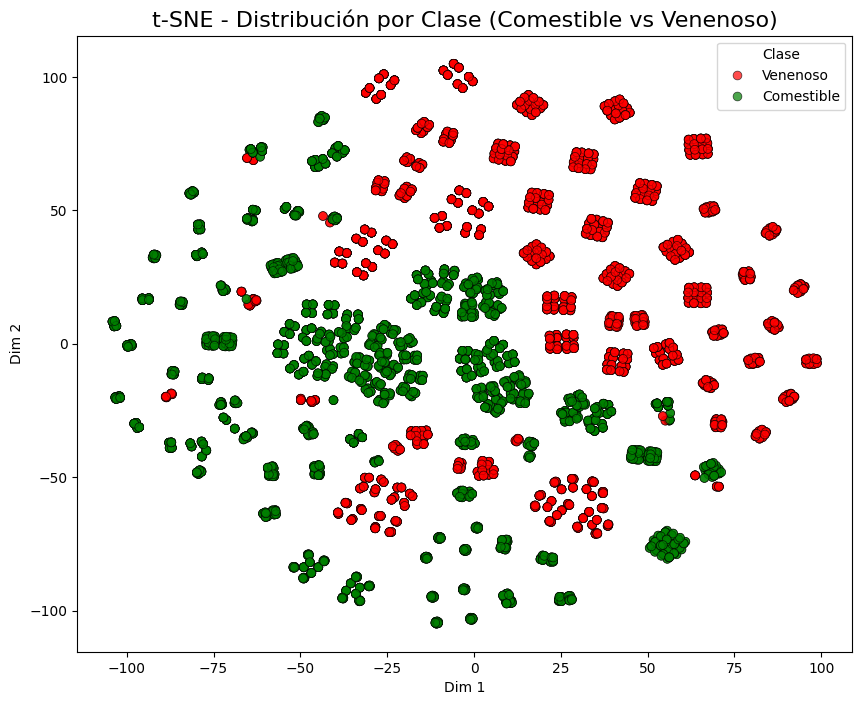

In [ ]:
# --- Librerías ---
from sklearn.manifold import TSNE
import umap.umap_ as umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- t-SNE ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(tsne_result, columns=['Dim 1', 'Dim 2'])
tsne_df['Clase'] = F_mapped.loc[df_clean.index].values

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=tsne_df, x='Dim 1', y='Dim 2',
    hue='Clase', palette={'Comestible': 'green', 'Venenoso': 'red'},
    alpha=0.7, s=40, edgecolor='black'
)
plt.title("t-SNE - Distribución por Clase (Comestible vs Venenoso)", fontsize=16)
plt.show()


=== OPTIMIZACIÓN DE GMM ===
Mejores parámetros: {'covariance_type': 'spherical', 'init_params': 'random', 'max_iter': 100, 'n_components': 2}
Mejor score de validación: 0.690

Accuracy del GMM optimizado: 0.680


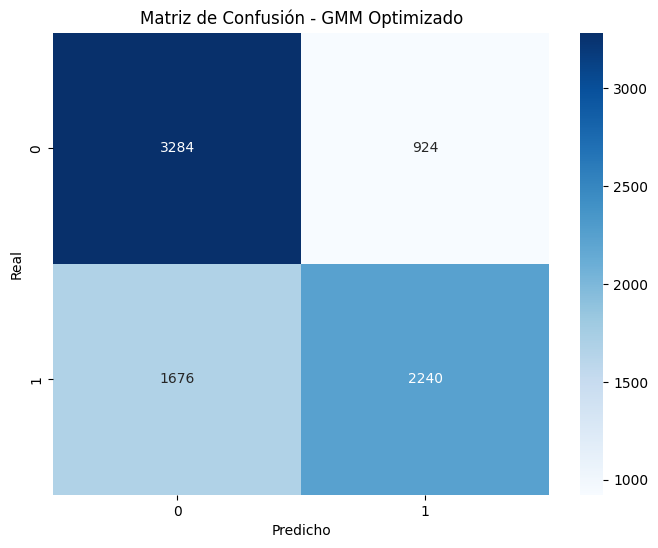


Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

           0       0.66      0.78      0.72      4208
           1       0.71      0.57      0.63      3916

    accuracy                           0.68      8124
   macro avg       0.69      0.68      0.67      8124
weighted avg       0.68      0.68      0.68      8124



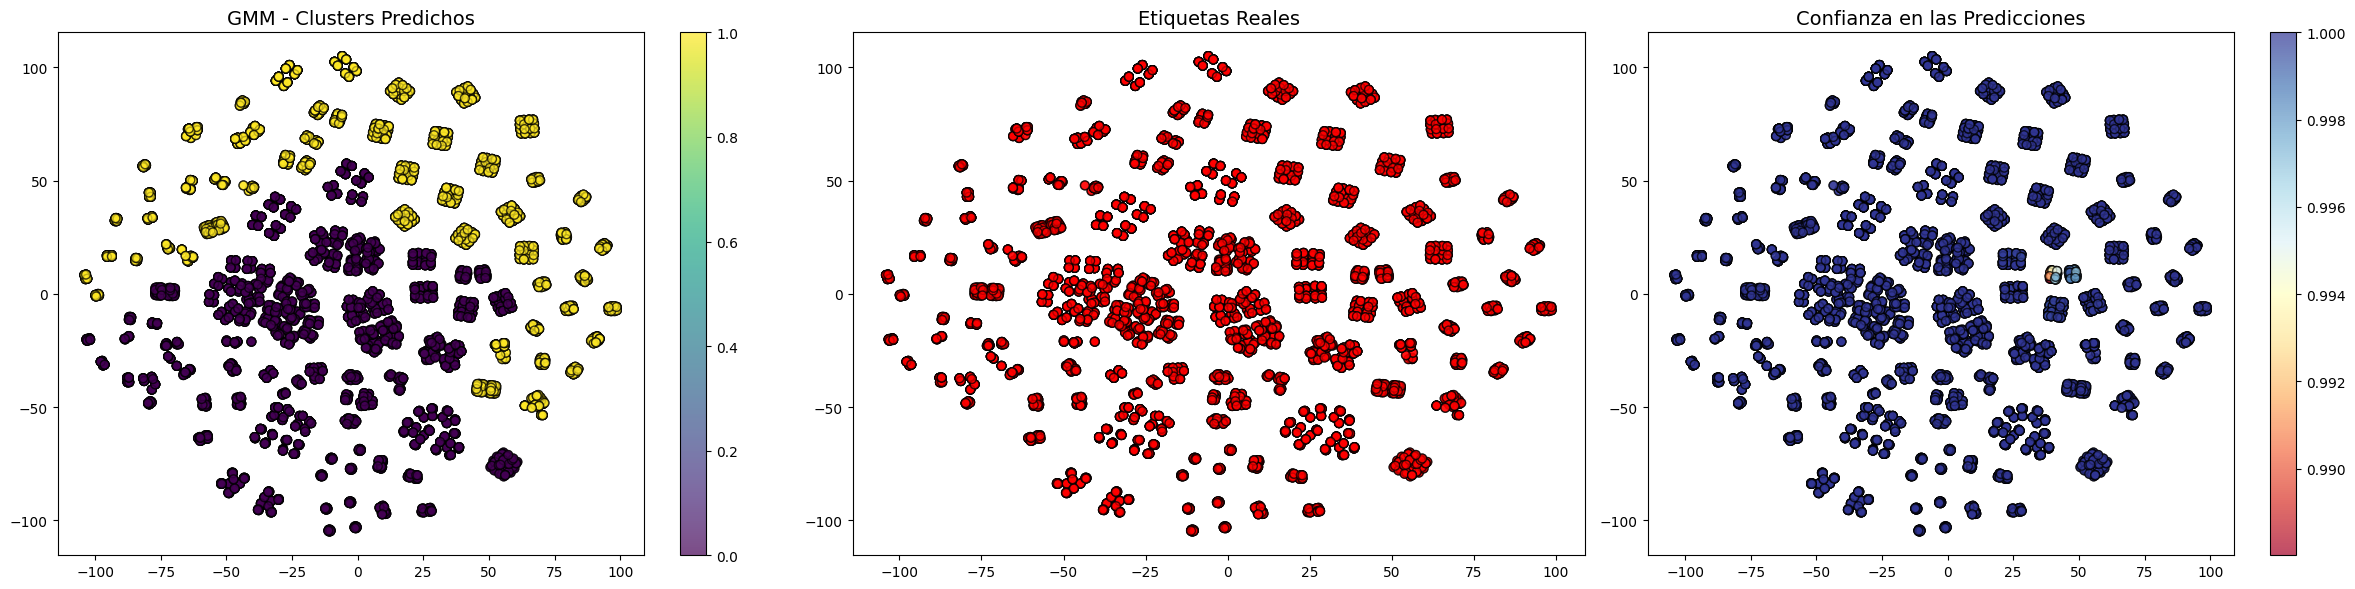


=== ANÁLISIS DE PROBABILIDADES ===
Cluster 0:
  - Probabilidad promedio: 0.610
  - Confianza mínima: 0.000
  - Confianza máxima: 1.000
Cluster 1:
  - Probabilidad promedio: 0.390
  - Confianza mínima: 0.000
  - Confianza máxima: 1.000

Muestras con confianza < 0.7: 0/8124 (0.0%)

=== VALIDACIÓN CRUZADA ===
Accuracy validación cruzada (5-fold): 0.690 (+/- 0.401)

=== COMPARACIÓN DE COMPONENTES ===
Medias de los componentes GMM:
Componente 0: [ 0.44878505 -0.34774709  0.15442398 -0.58150187 -0.06746999]...
Componente 1: [ 0.12087435 -0.07888907  0.36890441 -0.1554783   0.12702376]...

=== MÉTRICAS ADICIONALES ===
Precision: 0.684
Recall: 0.680
F1-Score: 0.676


In [259]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
F_encoded = le.fit_transform(F_mapped)  # 'Comestible'→0, 'Venenoso'→1

# --- Optimización de hiperparámetros para GMM ---
print("=== OPTIMIZACIÓN DE GMM ===")

# Definir parámetros a optimizar
param_grid = {
    'n_components': [2],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'max_iter': [100, 200, 300],
    'init_params': ['kmeans', 'random']
}

# Búsqueda grid con validación cruzada
gmm = GaussianMixture(random_state=42)
grid_search = GridSearchCV(gmm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, F_encoded)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score de validación: {grid_search.best_score_:.3f}")

# --- Entrenar modelo optimizado ---
best_gmm = grid_search.best_estimator_
gmm_labels = best_gmm.predict(X_scaled)
gmm_probs = best_gmm.predict_proba(X_scaled)

# --- Evaluación del modelo optimizado ---
accuracy = accuracy_score(F_encoded, gmm_labels)
print(f"\nAccuracy del GMM optimizado: {accuracy:.3f}")

# Matriz de confusión
cm = confusion_matrix(F_encoded, gmm_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(F_encoded),
            yticklabels=np.unique(F_encoded))
plt.title('Matriz de Confusión - GMM Optimizado')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

print("\nReporte de Clasificación Detallado:")
print(classification_report(F_encoded, gmm_labels))

# --- Visualización de resultados en t-SNE ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# 1. Resultados GMM
scatter1 = ax1.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                      c=gmm_labels, cmap='viridis', alpha=0.7, s=40, edgecolor='black')
ax1.set_title('GMM - Clusters Predichos', fontsize=14)
plt.colorbar(scatter1, ax=ax1)

# 2. Etiquetas reales
colors_real = ['green' if cls == 'Comestible' else 'red' for cls in F_encoded]
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                      c=colors_real, alpha=0.7, s=40, edgecolor='black')
ax2.set_title('Etiquetas Reales', fontsize=14)

# 3. Confianza de las predicciones
confidence = np.max(gmm_probs, axis=1)
scatter3 = ax3.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                      c=confidence, cmap='RdYlBu', alpha=0.7, s=40, edgecolor='black')
ax3.set_title('Confianza en las Predicciones', fontsize=14)
plt.colorbar(scatter3, ax=ax3)

plt.tight_layout()
plt.show()

# --- Análisis de probabilidades por clase ---
print("\n=== ANÁLISIS DE PROBABILIDADES ===")
for i, class_name in enumerate(best_gmm.means_):
    print(f"Cluster {i}:")
    print(f"  - Probabilidad promedio: {np.mean(gmm_probs[:, i]):.3f}")
    print(f"  - Confianza mínima: {np.min(gmm_probs[:, i]):.3f}")
    print(f"  - Confianza máxima: {np.max(gmm_probs[:, i]):.3f}")

# --- Identificar muestras con baja confianza ---
low_confidence_threshold = 0.7
low_confidence_mask = confidence < low_confidence_threshold
low_confidence_count = np.sum(low_confidence_mask)

print(f"\nMuestras con confianza < {low_confidence_threshold}: {low_confidence_count}/{len(confidence)} ({low_confidence_count/len(confidence)*100:.1f}%)")

# --- Validación cruzada adicional ---
print("\n=== VALIDACIÓN CRUZADA ===")
cv_scores = cross_val_score(best_gmm, X_scaled, F_encoded, cv=5, scoring='accuracy')
print(f"Accuracy validación cruzada (5-fold): {np.mean(cv_scores):.3f} (+/- {np.std(cv_scores)*2:.3f})")

# --- Comparación de medias de los componentes ---
print("\n=== COMPARACIÓN DE COMPONENTES ===")
print("Medias de los componentes GMM:")
for i, mean in enumerate(best_gmm.means_):
    print(f"Componente {i}: {mean[:5]}...")  # Mostrar solo primeras 5 características

# --- Métricas adicionales ---
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(F_encoded, gmm_labels, average='weighted')
recall = recall_score(F_encoded, gmm_labels, average='weighted')
f1 = f1_score(F_encoded, gmm_labels, average='weighted')

print(f"\n=== MÉTRICAS ADICIONALES ===")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

c:\Users\Coder\Documents\Hongos\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


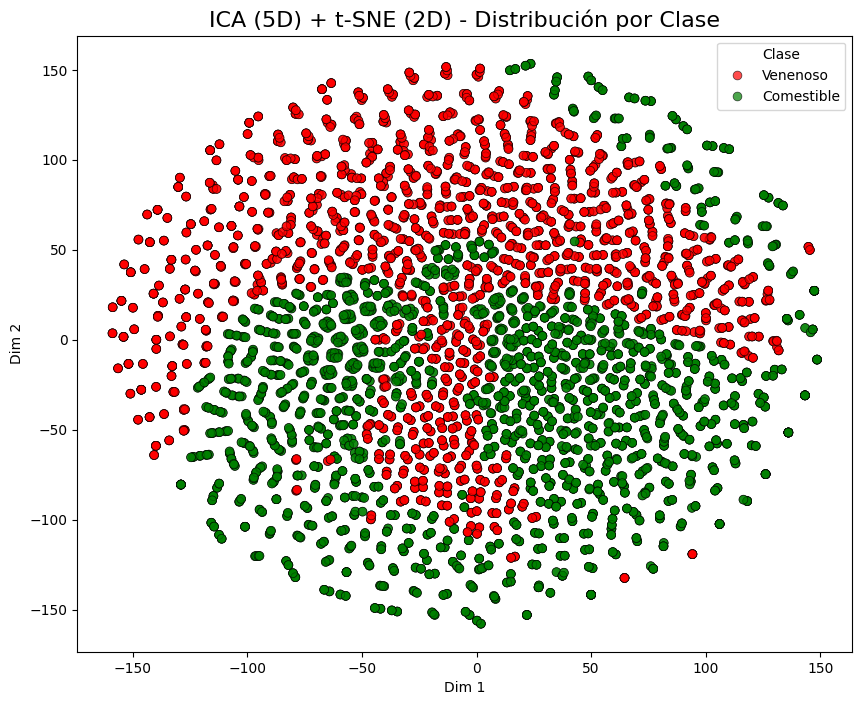

In [ ]:
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- ICA previo para extracción de componentes independientes ---
ica = FastICA(n_components=5, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

# --- t-SNE ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(X_ica)

tsne_df = pd.DataFrame(tsne_result, columns=['Dim 1', 'Dim 2'])
tsne_df['Clase'] = F_mapped.loc[df_clean.index].values

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=tsne_df, x='Dim 1', y='Dim 2',
    hue='Clase', palette={'Comestible': 'green', 'Venenoso': 'red'},
    alpha=0.7, s=40, edgecolor='black'
)
plt.title("ICA (5D) + t-SNE (2D) - Distribución por Clase", fontsize=16)
plt.show()


=== OPTIMIZACIÓN DE GMM ===
Mejores parámetros: {'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'n_components': 2}
Mejor score de validación: 0.696

Accuracy del GMM optimizado: 0.587


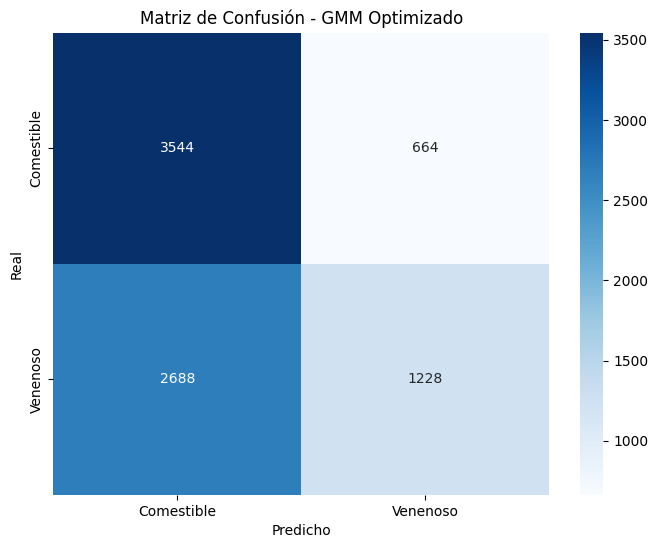


Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

  Comestible       0.57      0.84      0.68      4208
    Venenoso       0.65      0.31      0.42      3916

    accuracy                           0.59      8124
   macro avg       0.61      0.58      0.55      8124
weighted avg       0.61      0.59      0.56      8124



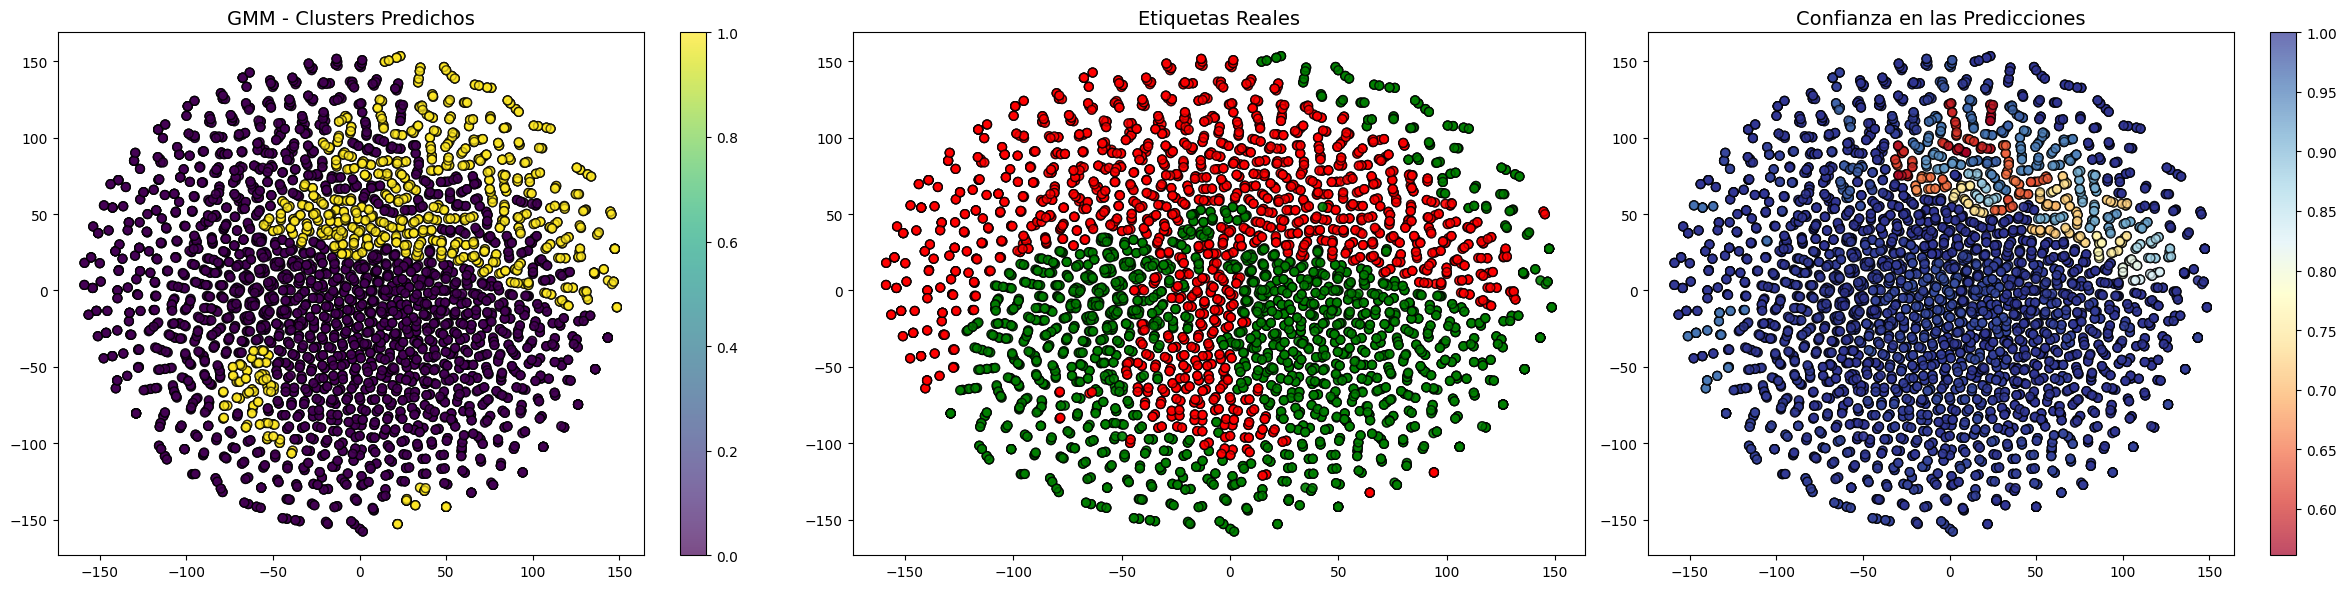


=== ANÁLISIS DE PROBABILIDADES ===
Cluster 0:
  - Probabilidad promedio: 0.746
  - Confianza mínima: 0.000
  - Confianza máxima: 1.000
Cluster 1:
  - Probabilidad promedio: 0.254
  - Confianza mínima: 0.000
  - Confianza máxima: 1.000

Muestras con confianza < 0.7: 288/8124 (3.5%)

=== VALIDACIÓN CRUZADA ===
Accuracy validación cruzada (5-fold): 0.696 (+/- 0.538)

=== COMPARACIÓN DE COMPONENTES ===
Medias de los componentes GMM:
Componente 0: [-0.22291453  0.23037071  0.01372379  0.1752453   0.06167779]...
Componente 1: [ 0.65550366 -0.67742932 -0.04035626 -0.51532725 -0.18137003]...

=== MÉTRICAS ADICIONALES ===
Precision: 0.607
Recall: 0.587
F1-Score: 0.555


In [263]:
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# --- Paso 3: Codificar etiquetas ---
le = LabelEncoder()
F_encoded = le.fit_transform(F_mapped)  # 'Comestible' -> 0, 'Venenoso' -> 1

# --- Paso 4: Optimización de GMM ---
param_grid = {
    'n_components': [2],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'max_iter': [100, 200, 300],
    'init_params': ['kmeans', 'random']
}

print("=== OPTIMIZACIÓN DE GMM ===")
gmm = GaussianMixture(random_state=42)
grid_search = GridSearchCV(gmm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_ica, F_encoded)  # Se entrena sobre componentes ICA
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score de validación: {grid_search.best_score_:.3f}")

# --- Entrenar modelo optimizado ---
best_gmm = grid_search.best_estimator_
gmm_labels = best_gmm.predict(X_ica)
gmm_probs = best_gmm.predict_proba(X_ica)

# --- Evaluación ---
accuracy = accuracy_score(F_encoded, gmm_labels)
print(f"\nAccuracy del GMM optimizado: {accuracy:.3f}")

cm = confusion_matrix(F_encoded, gmm_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - GMM Optimizado')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

print("\nReporte de Clasificación Detallado:")
print(classification_report(F_encoded, gmm_labels, target_names=le.classes_))

# --- Visualización en t-SNE ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# 1. Clusters predichos
scatter1 = ax1.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                      c=gmm_labels, cmap='viridis', alpha=0.7, s=40, edgecolor='black')
ax1.set_title('GMM - Clusters Predichos', fontsize=14)
plt.colorbar(scatter1, ax=ax1)

# 2. Etiquetas reales
colors_real = ['green' if cls == 'Comestible' else 'red' for cls in F_mapped]
scatter2 = ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                      c=colors_real, alpha=0.7, s=40, edgecolor='black')
ax2.set_title('Etiquetas Reales', fontsize=14)

# 3. Confianza de predicciones
confidence = np.max(gmm_probs, axis=1)
scatter3 = ax3.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                      c=confidence, cmap='RdYlBu', alpha=0.7, s=40, edgecolor='black')
ax3.set_title('Confianza en las Predicciones', fontsize=14)
plt.colorbar(scatter3, ax=ax3)

plt.tight_layout()
plt.show()

# --- Análisis de probabilidades por cluster ---
print("\n=== ANÁLISIS DE PROBABILIDADES ===")
for i in range(best_gmm.n_components):
    print(f"Cluster {i}:")
    print(f"  - Probabilidad promedio: {np.mean(gmm_probs[:, i]):.3f}")
    print(f"  - Confianza mínima: {np.min(gmm_probs[:, i]):.3f}")
    print(f"  - Confianza máxima: {np.max(gmm_probs[:, i]):.3f}")

# --- Identificación de muestras con baja confianza ---
low_confidence_threshold = 0.7
low_confidence_mask = confidence < low_confidence_threshold
low_confidence_count = np.sum(low_confidence_mask)
print(f"\nMuestras con confianza < {low_confidence_threshold}: {low_confidence_count}/{len(confidence)} ({low_confidence_count/len(confidence)*100:.1f}%)")

# --- Validación cruzada ---
print("\n=== VALIDACIÓN CRUZADA ===")
cv_scores = cross_val_score(best_gmm, X_ica, F_encoded, cv=5, scoring='accuracy')
print(f"Accuracy validación cruzada (5-fold): {np.mean(cv_scores):.3f} (+/- {np.std(cv_scores)*2:.3f})")

# --- Comparación de medias de los componentes ---
print("\n=== COMPARACIÓN DE COMPONENTES ===")
print("Medias de los componentes GMM:")
for i, mean in enumerate(best_gmm.means_):
    print(f"Componente {i}: {mean[:10]}...")  # Mostrar solo primeras 5 características

# --- Métricas adicionales ---
precision = precision_score(F_encoded, gmm_labels, average='weighted')
recall = recall_score(F_encoded, gmm_labels, average='weighted')
f1 = f1_score(F_encoded, gmm_labels, average='weighted')
print(f"\n=== MÉTRICAS ADICIONALES ===")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


c:\Users\Coder\Documents\Hongos\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Muestras con confianza < 0.7: 5030/8124 (61.92%)


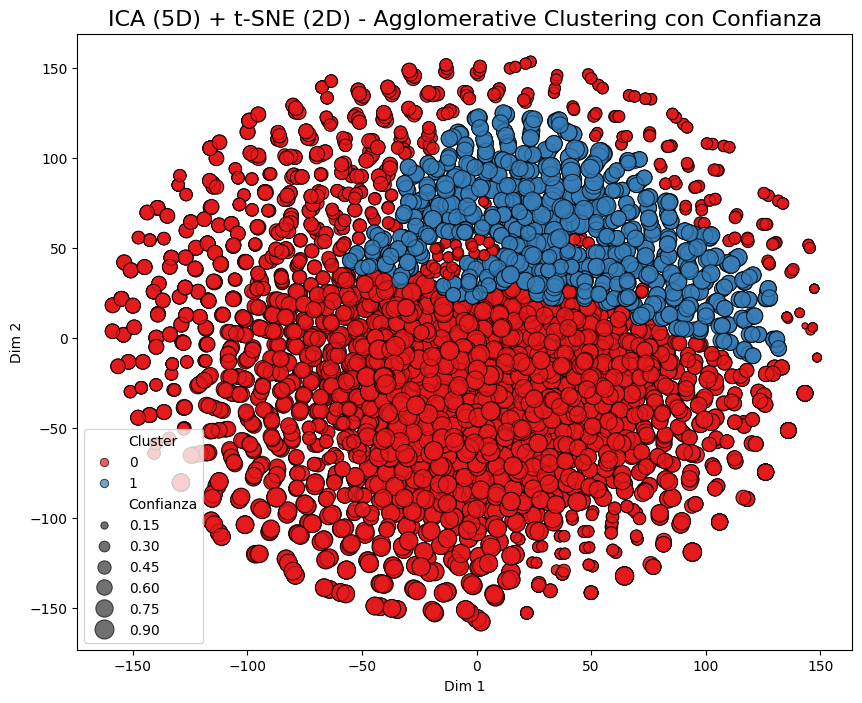

=== Comparación de componentes por cluster ===
            ICA_1     ICA_2     ICA_3     ICA_4     ICA_5
Cluster                                                  
0       -0.340418  0.274361 -0.050763  0.230674 -0.121742
1        1.260018 -1.015515  0.187893 -0.853814  0.450615
Silhouette Score: 0.290
=== Reporte de Clasificación ===
              precision    recall  f1-score   support

  Comestible       0.66      1.00      0.79      4208
    Venenoso       1.00      0.44      0.61      3916

    accuracy                           0.73      8124
   macro avg       0.83      0.72      0.70      8124
weighted avg       0.82      0.73      0.71      8124

Silhouette Score: 0.290
Silhouette Score promedio CV (subsampling): 0.290


In [267]:
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, silhouette_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- ICA previo para extracción de componentes independientes ---
ica = FastICA(n_components=5, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_scaled)

# --- t-SNE para visualización ---
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(X_ica)

tsne_df = pd.DataFrame(tsne_result, columns=['Dim 1', 'Dim 2'])
tsne_df['Clase'] = F_mapped.loc[df_clean.index].values

# --- Agglomerative Clustering ---
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = agglo.fit_predict(X_ica)
tsne_df['Cluster'] = cluster_labels

# --- Estimación de "confianza" --- 
# Para Agglomerative no hay probabilidad directa, aproximamos usando distancia al cluster centroid
from scipy.spatial.distance import cdist
centroids = np.array([X_ica[cluster_labels==i].mean(axis=0) for i in range(2)])
distances = cdist(X_ica, centroids, 'euclidean')
confidence = 1 - (distances.min(axis=1) / distances.max())
tsne_df['Confianza'] = confidence

# Muestras con baja confianza
low_confidence = (confidence < 0.7).sum()
total_samples = len(confidence)
print(f"Muestras con confianza < 0.7: {low_confidence}/{total_samples} ({low_confidence/total_samples*100:.2f}%)")

# --- Visualización de clusters y confianza ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=tsne_df, x='Dim 1', y='Dim 2',
    hue='Cluster', palette='Set1',
    size='Confianza', sizes=(20, 200),
    alpha=0.7, edgecolor='black'
)
plt.title("ICA (5D) + t-SNE (2D) - Agglomerative Clustering con Confianza", fontsize=16)
plt.show()

# --- Comparación de componentes ICA vs clusters ---
ica_df = pd.DataFrame(X_ica, columns=[f'ICA_{i+1}' for i in range(5)])
ica_df['Cluster'] = cluster_labels
print("=== Comparación de componentes por cluster ===")
print(ica_df.groupby('Cluster').mean())

# --- Métricas adicionales ---
sil_score = silhouette_score(X_ica, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

# --- Reporte de Clasificación Detallado ---
# Asignamos clusters a las etiquetas reales usando pandas mode
cluster_to_class = {}
for i in range(2):
    cluster_classes = tsne_df.loc[tsne_df['Cluster'] == i, 'Clase']
    most_common_class = cluster_classes.mode()[0]  # pandas mode soporta strings
    cluster_to_class[i] = most_common_class

predicted_classes = tsne_df['Cluster'].map(cluster_to_class)

print("=== Reporte de Clasificación ===")
print(classification_report(tsne_df['Clase'], predicted_classes))

# --- Validación cruzada (opcional, usando StratifiedKFold sobre etiquetas reales) ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# --- Métrica Silhouette sobre todo el dataset ---
sil_score = silhouette_score(X_ica, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

# --- Validación cruzada alternativa (subsampling) ---
# Tomamos varias muestras aleatorias y medimos silhouette
np.random.seed(42)
sil_scores_cv = []
for i in range(5):
    idx = np.random.choice(len(X_ica), size=int(0.8*len(X_ica)), replace=False)
    X_sub = X_ica[idx]
    cluster_sub = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(X_sub)
    sil_scores_cv.append(silhouette_score(X_sub, cluster_sub))
print(f"Silhouette Score promedio CV (subsampling): {np.mean(sil_scores_cv):.3f}")

